In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")

# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}

for col in ['gender', 'smoking_history']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Drop missing values
df_encoded.dropna(inplace=True)

# Define features and target
X = df_encoded.drop("diabetes", axis=1)
y = df_encoded["diabetes"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9709

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000


Confusion Matrix:
 [[18233    59]
 [  523  1185]]


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")

# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}

for col in ['gender', 'smoking_history']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Drop missing values
df_encoded.dropna(inplace=True)

# Define features and target
X = df_encoded.drop("diabetes", axis=1)
y = df_encoded["diabetes"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, classification_rep, conf_matrix


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


(0.9709,
 '              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98     18292\n           1       0.95      0.69      0.80      1708\n\n    accuracy                           0.97     20000\n   macro avg       0.96      0.85      0.89     20000\nweighted avg       0.97      0.97      0.97     20000\n',
 array([[18233,    59],
        [  523,  1185]]))

Confusion Matrix

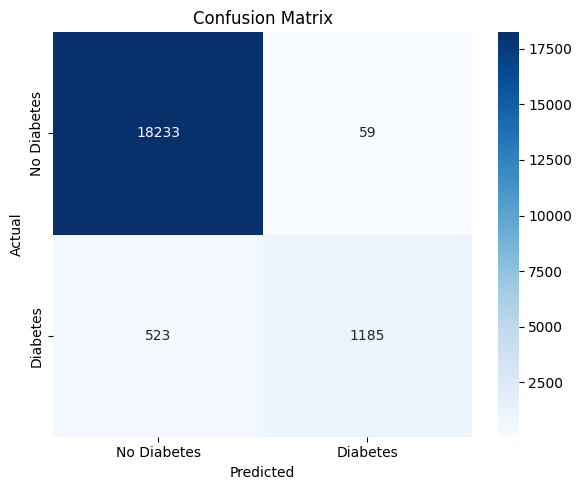

In [3]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=300)



ROC CURVE

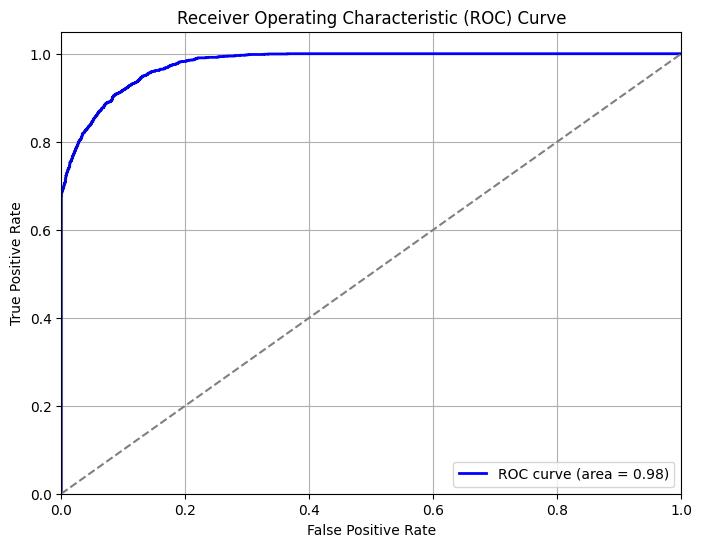

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [14]:
pip install mealpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 55.9 MB/s eta 0:00:00


In [15]:
# Apply Metaheuristic OPtimization Algorithm

Selected Features: ['age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
Best Parameters: {'learning_rate': np.float64(0.06785603575528826), 'max_depth': 3, 'n_estimators': 147, 'subsample': np.float64(0.7691428450854638), 'colsample_bytree': np.float64(0.9387273319467203)}
Test Accuracy: 0.9726


<Figure size 600x400 with 0 Axes>

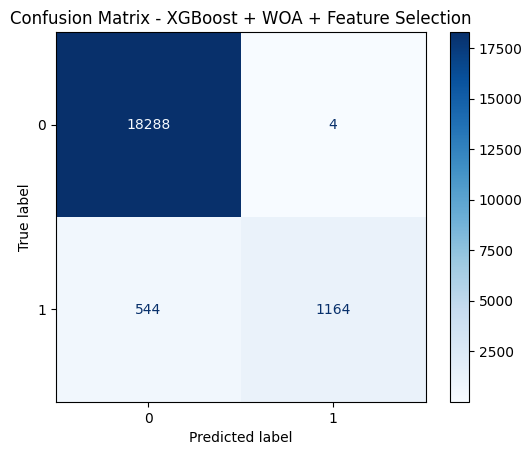

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from mealpy import FloatVar
from mealpy.swarm_based import WOA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load and preprocess data
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df = df.dropna()
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

X_full = df.drop("diabetes", axis=1)
y = df["diabetes"]
feature_names = X_full.columns.tolist()
n_features = X_full.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

# Objective function with feature selection
def objective_function(solution):
    # First part: feature selection (binary vector)
    feature_mask = np.round(solution[:n_features]).astype(bool)

    if not np.any(feature_mask):  # Prevent no feature selected
        return 1.0

    X_train_sel = X_train.iloc[:, feature_mask]

    # Second part: XGBoost hyperparameters
    learning_rate = solution[n_features]
    max_depth = int(solution[n_features + 1])
    n_estimators = int(solution[n_features + 2])
    subsample = solution[n_features + 3]
    colsample_bytree = solution[n_features + 4]

    model = XGBClassifier(
        learning_rate=learning_rate,
        max_depth=max_depth,
        n_estimators=n_estimators,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        use_label_encoder=False,
        eval_metric='logloss'
    )

    try:
        scores = cross_val_score(model, X_train_sel, y_train, cv=3, scoring='accuracy')
        return -scores.mean()  # Minimize negative accuracy
    except:
        return 1.0  # Penalize invalid models

# Define bounds
lower_bounds = [0] * n_features + [0.01, 3, 50, 0.5, 0.5]
upper_bounds = [1] * n_features + [0.3, 10, 300, 1.0, 1.0]

problem = {
    "obj_func": objective_function,
    "bounds": FloatVar(lb=lower_bounds, ub=upper_bounds),
    "minmax": "min",
    "log_to": None,
}

# Run WOA with feature selection
model = WOA.OriginalWOA(epoch=50, pop_size=20)
g_best = model.solve(problem)

# Extract best feature subset and hyperparameters
best_solution = g_best.solution
best_mask = np.round(best_solution[:n_features]).astype(bool)
best_params = {
    'learning_rate': best_solution[n_features],
    'max_depth': int(best_solution[n_features + 1]),
    'n_estimators': int(best_solution[n_features + 2]),
    'subsample': best_solution[n_features + 3],
    'colsample_bytree': best_solution[n_features + 4],
}

selected_features = [f for f, use in zip(feature_names, best_mask) if use]
print(f"Selected Features: {selected_features}")
print(f"Best Parameters: {best_params}")

# Train final model
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

final_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
final_model.fit(X_train_sel, y_train)
y_pred = final_model.predict(X_test_sel)

# Accuracy and Confusion Matrix
acc = final_model.score(X_test_sel, y_test)
print(f"Test Accuracy: {acc}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)

plt.figure(figsize=(6, 4))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - XGBoost + WOA + Feature Selection")
plt.savefig("confusion_matrix_xgboost_woa_fs.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Classification report
report = classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic'])
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

Non-Diabetic       0.97      1.00      0.99     18292
    Diabetic       1.00      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



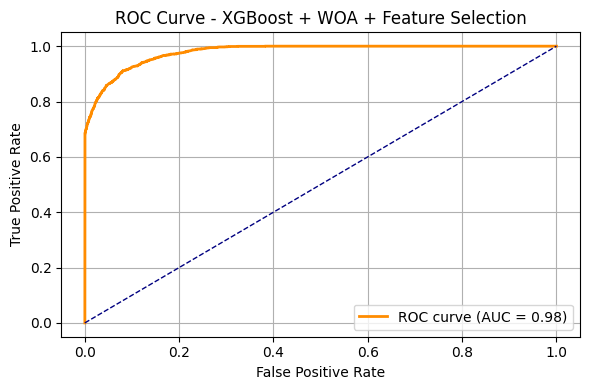

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y_proba = final_model.predict_proba(X_test_sel)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost + WOA + Feature Selection')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig("roc_curve_xgboost_woa_fs.png", dpi=300)
plt.show()


In [16]:
###########END###############